In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import datetime as dt
import plotly.express as px

In [3]:
name_DF = pd.read_csv(r"C:\Users\agori\Downloads\Projet 2\name_basics.tsv", sep = "\t", low_memory = False)

In [4]:
basics_DF = pd.read_csv(r"C:\Users\agori\Downloads\Projet 2\title_basics.tsv", sep = "\t", low_memory = False)

In [5]:
principals_DF = pd.read_csv(r"C:\Users\agori\Downloads\Projet 2\title_principals.tsv", sep = "\t", low_memory = False)

In [6]:
ratings_DF = pd.read_csv(r"C:\Users\agori\Downloads\Projet 2\title_ratings.tsv", sep = "\t", low_memory = False)

In [7]:
akas_DF = pd.read_csv(r"C:\Users\agori\Downloads\Projet 2\title_akas.tsv", sep = "\t", low_memory = False)

# SELECTIONS DES COLONNES UTILES

In [7]:
name_DF.drop('deathYear', axis = 1, inplace = True)
name_DF.drop('birthYear', axis = 1, inplace = True)
name_DF.drop('primaryProfession', axis = 1, inplace = True) 
name_DF.drop('knownForTitles', axis = 1, inplace = True) 

In [ ]:
name_DF.head()

In [8]:
akas_DF.drop('ordering', axis = 1, inplace = True) 
akas_DF.drop('title', axis = 1, inplace = True) 
akas_DF.drop('language', axis = 1, inplace = True)
akas_DF.drop('types', axis = 1, inplace = True) 
akas_DF.drop('attributes', axis = 1, inplace = True) 
akas_DF.drop('isOriginalTitle', axis = 1, inplace = True) 

In [ ]:
akas_DF

In [9]:
basics_DF.drop('originalTitle', axis = 1, inplace = True)
basics_DF.drop('endYear', axis = 1, inplace = True)

In [ ]:
basics_DF

In [10]:
principals_DF.drop('job', axis = 1, inplace = True)
#principals_DF.drop('ordering', axis = 1, inplace = True)
principals_DF.drop('characters', axis = 1, inplace = True)
principals_DF

,tconst,ordering,nconst,category
0,tt0000001,1,nm1588970,self
1,tt0000001,2,nm0005690,director
2,tt0000001,3,nm0374658,cinematographer
3,tt0000002,1,nm0721526,director
4,tt0000002,2,nm1335271,composer
...,...,...,...,...
47303097,tt9916880,4,nm10535738,actress
47303098,tt9916880,5,nm0996406,director
47303099,tt9916880,6,nm1482639,writer
47303100,tt9916880,7,nm2586970,writer


# NETTOYAGE ET FILTRES

In [11]:
# Nettoyage de la base relative aux films et films tv :
basics_DF = basics_DF[basics_DF['titleType'].str.contains('movie')]
basics_DF_clean1 = basics_DF[basics_DF['runtimeMinutes'] != '\\N']
basics_DF_clean2 = basics_DF_clean1.astype({"runtimeMinutes": int})
basics_DF_clean = basics_DF_clean2[basics_DF_clean2['runtimeMinutes'] >= 60]
basics_DF_clean = basics_DF_clean.dropna(subset = ['startYear'])
basics_DF_clean = basics_DF_clean[basics_DF_clean['startYear'] != '\\N']
basics_DF_clean = basics_DF_clean.astype({"startYear": int})
basics_DF_clean = basics_DF_clean[basics_DF_clean['startYear'] >= 1960 ]
basics_DF_clean = basics_DF_clean.astype({"isAdult": int})
basics_DF_clean = basics_DF_clean[basics_DF_clean['isAdult'] <= 0 ]
# --> nous avons maintenant un DF contenant uniquement des films dont la durée est supérieure à 60 minutes et dont nous avons des 'startYear' renseignés

In [12]:
akas_DF = akas_DF.dropna(subset = ['region'])
akas_DF = akas_DF[akas_DF['region'].str.contains('FR')]

In [13]:
akas_DF

,titleId,region
9,tt0000002,FR
23,tt0000003,FR
26,tt0000004,FR
73,tt0000010,FR
78,tt0000010,FR
...,...,...
29499626,tt9916844,FR
29499630,tt9916846,FR
29499637,tt9916848,FR
29499646,tt9916850,FR


In [34]:
# Nettoyage de la base relative category, contenant les clés des 2 tables précédentes :
director_DF = principals_DF[principals_DF['category'].str.contains('director')]
actor_DF = principals_DF[principals_DF['category'].str.contains('actor|actress')]
# --> nous pouvons maintenant joindre les 2 bases de données grâce à cette table commune

In [25]:
director_DF

,tconst,ordering,nconst,category
1,tt0000001,2,nm0005690,director
3,tt0000002,1,nm0721526,director
5,tt0000003,1,nm0721526,director
9,tt0000004,1,nm0721526,director
13,tt0000005,3,nm0005690,director
...,...,...,...,...
47303072,tt9916850,6,nm5519375,director
47303081,tt9916852,5,nm5519454,director
47303082,tt9916852,6,nm5519375,director
47303090,tt9916856,5,nm10538645,director


In [35]:
director_DF = director_DF.sort_values(by=['tconst', 'ordering'])
director_DF2 = director_DF.drop_duplicates(subset ="tconst", keep = 'first')

In [36]:
director_DF2

,tconst,ordering,nconst,category
1,tt0000001,2,nm0005690,director
3,tt0000002,1,nm0721526,director
5,tt0000003,1,nm0721526,director
9,tt0000004,1,nm0721526,director
13,tt0000005,3,nm0005690,director
...,...,...,...,...
47303061,tt9916848,5,nm5519454,director
47303071,tt9916850,5,nm5519454,director
47303081,tt9916852,5,nm5519454,director
47303090,tt9916856,5,nm10538645,director


In [37]:
name_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11305008 entries, 0 to 11305007
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   nconst       object
 1   primaryName  object
dtypes: object(2)
memory usage: 172.5+ MB


In [38]:
ratings_DF = ratings_DF.dropna(subset = ['numVotes'])
ratings_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195013 entries, 0 to 1195012
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1195013 non-null  object 
 1   averageRating  1195013 non-null  float64
 2   numVotes       1195013 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 36.5+ MB


# MERGE DES DF

In [39]:
# Merge principals_DF avec name_DF :

Dir_DF2 = pd.merge(director_DF2, name_DF, how = 'inner', left_on=['nconst'], right_on=['nconst'])
Dir_DF2.reset_index(drop=True,inplace = True)

In [40]:
Act_DF = pd.merge(actor_DF, name_DF, how = 'inner', left_on=['nconst'], right_on=['nconst'])
Act_DF2 = Act_DF[Act_DF['ordering'] <= 3]
Act_DF2.reset_index(drop=True,inplace = True)

In [41]:
Dir_DF3 = Dir_DF2.pivot_table(columns= 'category',  # columns
                       index = 'tconst',     # rows
                       values = 'primaryName',
                   fill_value = 'unknown',
                   aggfunc = np.sum) 

In [42]:
Dir_DF3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4278083 entries, tt0000001 to tt9916880
Data columns (total 1 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   director  object
dtypes: object(1)
memory usage: 65.3+ MB


In [43]:
Act_DF3 = Act_DF2.pivot_table(columns= 'ordering',  # columns
                       index = 'tconst',     # rows
                       values = 'primaryName',
                   fill_value = 'unknown',
                   aggfunc = np.sum)  

In [44]:
Act_DF3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4639488 entries, tt0000005 to tt9916880
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   1       object
 1   2       object
 2   3       object
dtypes: object(3)
memory usage: 141.6+ MB


In [45]:
act_dir_DF = pd.merge(Act_DF3,Dir_DF3, how = 'left', left_on=['tconst'], right_on=['tconst'])
act_dir_DF['director'].fillna('unknown', inplace = True)
act_dir_DF.head()

,1,2,3,director
tconst,,,,
tt0000005,Charles Kayser,John Ott,unknown,William K.L. Dickson
tt0000007,James J. Corbett,Peter Courtney,unknown,William K.L. Dickson
tt0000008,Fred Ott,unknown,unknown,William K.L. Dickson
tt0000009,Blanche Bayliss,William Courtenay,Chauncey Depew,Alexander Black
tt0000011,Grunato,unknown,unknown,Max Skladanowsky


In [46]:
akas_DF2 = akas_DF.rename({'titleId': 'tconst'}, axis=1)

Movie_FR_DF1 = pd.merge(basics_DF_clean,akas_DF2, how = 'inner', left_on=['tconst'], right_on=['tconst'])
Movie_FR_DF1.reset_index(drop=True, inplace = True)
Movie_FR_DF = Movie_FR_DF1.drop_duplicates()
Movie_FR_DF.head(10)

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,region
0,tt0011216,movie,Spanish Fiesta,0,2019,67,Drama,FR
1,tt0015414,movie,La tierra de los toros,0,2000,60,\N,FR
3,tt0035423,movie,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance",FR
4,tt0036177,movie,Muhomatsu no issho,0,2008,100,"Action,Adventure",FR
5,tt0036606,movie,"Another Time, Another Place",0,1983,118,"Drama,War",FR
6,tt0039442,movie,"Habla, mudita",0,1973,88,Drama,FR
7,tt0044952,movie,Nagarik,0,1977,127,Drama,FR
8,tt0048162,movie,Herr Puntila and His Servant Matti,0,1960,97,"Comedy,Drama,Musical",FR
10,tt0050441,movie,Romeo e Giulietta,0,1964,95,Drama,FR
11,tt0051582,movie,The Crossroads,0,1960,90,Drama,FR


In [22]:
# Merge Act_and_Dir_DF avec basics_DF_clean :

#DF = pd.merge(Act_and_Dir_DF,basics_DF_clean, how = 'right', left_on=['tconst'], right_on=['tconst'])
#DF.reset_index(inplace = True)

In [47]:
# Merge Act_and_Dir_DF avec basics_DF_clean :

Rates_DF = pd.merge(Movie_FR_DF,ratings_DF, how = 'inner', left_on=['tconst'], right_on=['tconst'])
Rates_DF.reset_index(drop=True, inplace = True)

In [48]:
Rates_DF_full = pd.merge(Movie_FR_DF,ratings_DF, how = 'left', left_on=['tconst'], right_on=['tconst'])
Rates_DF_full.reset_index(drop=True, inplace = True)

In [49]:
# Ajout d'une colonne "Période" pour définir les décénnies : 
Rates_DF_full['Période'] = (Rates_DF_full['startYear'] //10) *10

In [50]:
DF_FULL = pd.merge(Rates_DF_full,act_dir_DF, how = 'left', left_on=['tconst'], right_on=['tconst'])
DF_FULL.reset_index(drop=True, inplace = True)

In [51]:
# compression_opts = dict(method='zip',archive_name='DF_FULL.csv')  
# DF_FULL.to_csv('DF_FULL.zip', index=False,compression=compression_opts) 

In [52]:
# Ajout d'une colonne "Période" pour définir les décénnies : 
Rates_DF['Période'] = (Rates_DF['startYear'] //10) *10

In [53]:
Rates_DF.isna().sum()

tconst            0
titleType         0
primaryTitle      0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
region            0
averageRating     0
numVotes          0
Période           0
dtype: int64

In [54]:
DF_FULL.isna().sum()

tconst               0
titleType            0
primaryTitle         0
isAdult              0
startYear            0
runtimeMinutes       0
genres               0
region               0
averageRating     3861
numVotes          3861
Période              0
1                 4654
2                 4654
3                 4654
director          4654
dtype: int64

In [55]:
DF_FULL = DF_FULL.dropna(subset = ['director'])

In [56]:
DF_FULL.isna().sum()

tconst               0
titleType            0
primaryTitle         0
isAdult              0
startYear            0
runtimeMinutes       0
genres               0
region               0
averageRating     1908
numVotes          1908
Période              0
1                    0
2                    0
3                    0
director             0
dtype: int64

In [57]:
Rates_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44879 entries, 0 to 44878
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          44879 non-null  object 
 1   titleType       44879 non-null  object 
 2   primaryTitle    44879 non-null  object 
 3   isAdult         44879 non-null  int32  
 4   startYear       44879 non-null  int32  
 5   runtimeMinutes  44879 non-null  int32  
 6   genres          44879 non-null  object 
 7   region          44879 non-null  object 
 8   averageRating   44879 non-null  float64
 9   numVotes        44879 non-null  int64  
 10  Période         44879 non-null  int32  
dtypes: float64(1), int32(4), int64(1), object(5)
memory usage: 3.1+ MB


In [58]:
Rates_DF.isin(['\\N']).sum(axis = 0)

tconst              0
titleType           0
primaryTitle        0
isAdult             0
startYear           0
runtimeMinutes      0
genres            421
region              0
averageRating       0
numVotes            0
Période             0
dtype: int64

In [59]:
DF_FULL.isin(['\\N']).sum(axis = 0)

tconst              0
titleType           0
primaryTitle        0
isAdult             0
startYear           0
runtimeMinutes      0
genres            807
region              0
averageRating       0
numVotes            0
Période             0
1                   0
2                   0
3                   0
director            0
dtype: int64

#  PONDERATION DES VOTES

In [60]:
# Calcul de la moyenne des votes :

C= Rates_DF['averageRating'].mean()
C

6.085447536709867

In [61]:
C1= DF_FULL['averageRating'].mean()
C1

6.021831286452738

In [62]:
# Calcul du quantiles à 90%

m= Rates_DF['numVotes'].quantile(0.9)
m

33470.60000000006

In [63]:
m2= DF_FULL['numVotes'].quantile(0.9)
m2

36473.10000000002

In [64]:
# maintenant nous pouvons filtrer les films à mettre dans le graph

qualify_movies=Rates_DF.copy().loc[Rates_DF['numVotes']>=m]
qualify_movies.shape

(4488, 11)

In [65]:
qualify_movies_DF_FULL=DF_FULL.copy().loc[DF_FULL['numVotes']>=m2]
qualify_movies_DF_FULL.shape

(4218, 15)

I will use IMDB's weighted rating formula to construct the foloowing chart.
Mathematically, the representation is like this :

$\large Weighted\; Rating (WR) = (\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

where,
    v is the number of votes for the movie
    m is the minimum votes required to be listed in the chart
    R is the average rating of the movie
    C is the mean vote across the whole report
    
Let's calcul this :

In [128]:
def movie_ponderation(x,m=m,C=C):
    v=x['numVotes']
    R=x['averageRating']
    #calculation based on IMDB formula
    
    return (v/(v+m)*R) + (m/(m+v)*C)

In [129]:
# définition d'un nouveau score appelé 'moyenne pondérée" et calcul de sa valeur avec la formule ci-dessus fournie par IMDb :

qualify_movies['moyenne_ponderee']= qualify_movies.apply(movie_ponderation,axis=1)

In [130]:
qualify_movies_DF_FULL['moyenne_ponderee']= qualify_movies_DF_FULL.apply(movie_ponderation,axis=1)

In [131]:
qualify_movies

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,region,averageRating,numVotes,Période,moyenne_ponderee,text_graph,genre1,genre2,genre3
14929,tt0111161,movie,The Shawshank Redemption,0,1994,142,Drama,FR,9.3,2473613,1990,9.257084,"Note : 9.26, nombre de votes : 2473613",Drama,None,None
5191,tt0068646,movie,The Godfather,0,1972,175,"Crime,Drama",FR,9.2,1709122,1970,9.140178,"Note : 9.14, nombre de votes : 1709122",Crime,Drama,None
26016,tt0468569,movie,The Dark Knight,0,2008,152,"Action,Crime,Drama",FR,9.0,2427590,2000,8.960362,"Note : 8.96, nombre de votes : 2427590",Action,Crime,Drama
6073,tt0071562,movie,The Godfather: Part II,0,1974,202,"Crime,Drama",FR,9.0,1187214,1970,8.920084,"Note : 8.92, nombre de votes : 1187214",Crime,Drama,None
14877,tt0110912,movie,Pulp Fiction,0,1994,154,"Crime,Drama",FR,8.9,1914883,1990,8.851649,"Note : 8.85, nombre de votes : 1914883",Crime,Drama,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41123,tt6038600,movie,Smolensk,0,2016,120,"Drama,Thriller",FR,1.2,38366,2010,3.476261,"Note : 3.48, nombre de votes : 38366",Drama,Thriller,None
26824,tt0799949,movie,Epic Movie,0,2007,86,"Adventure,Comedy,Fantasy",FR,2.4,103880,2000,3.298097,"Note : 3.3, nombre de votes : 103880",Adventure,Comedy,Fantasy
30189,tt1213644,movie,Disaster Movie,0,2008,87,"Comedy,Sci-Fi",FR,1.9,89547,2000,3.038776,"Note : 3.04, nombre de votes : 89547",Comedy,Sci-Fi,None
28924,tt10888594,movie,Radhe,0,2021,135,"Action,Crime,Thriller",FR,1.8,172625,2020,2.495971,"Note : 2.5, nombre de votes : 172625",Action,Crime,Thriller


In [132]:
qualify_movies_DF_FULL

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,region,averageRating,numVotes,Période,1,2,3,director,moyenne_ponderee,genre1,genre2,genre3
2,tt0035423,movie,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance",FR,6.4,81591.0,2000,Meg Ryan,Hugh Jackman,Liev Schreiber,James Mangold,6.308499,Comedy,Fantasy,Romance
63,tt0053472,movie,Breathless,0,1960,90,"Crime,Drama",FR,7.8,77500.0,1960,Jean-Paul Belmondo,Jean Seberg,Daniel Boulanger,Jean-Luc Godard,7.282862,Crime,Drama,None
83,tt0053604,movie,The Apartment,0,1960,125,"Comedy,Drama,Romance",FR,8.3,172635.0,1960,Jack Lemmon,Shirley MacLaine,Fred MacMurray,Billy Wilder,7.940367,Comedy,Drama,Romance
159,tt0053779,movie,The Sweet Life,0,1960,174,"Comedy,Drama",FR,8.0,70096.0,1960,Marcello Mastroianni,Anita Ekberg,Anouk Aimée,Federico Fellini,7.381256,Comedy,Drama,None
250,tt0054047,movie,The Magnificent Seven,0,1960,128,"Action,Adventure,Western",FR,7.7,91576.0,1960,Yul Brynner,Steve McQueen,Charles Bronson,John Sturges,7.267841,Action,Adventure,Western
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48599,tt9777644,movie,Da 5 Bloods,0,2020,154,"Adventure,Drama,War",FR,6.5,47914.0,2020,Delroy Lindo,Jonathan Majors,Clarke Peters,Spike Lee,6.329509,Adventure,Drama,War
48600,tt9777666,movie,The Tomorrow War,0,2021,138,"Action,Adventure,Drama",FR,6.6,169866.0,2020,Chris Pratt,Yvonne Strahovski,J.K. Simmons,Chris McKay,6.515301,Action,Adventure,Drama
48615,tt9784798,movie,Judas and the Black Messiah,0,2021,126,"Biography,Drama,History",FR,7.5,62107.0,2020,Daniel Kaluuya,LaKeith Stanfield,Jesse Plemons,Shaka King,7.004634,Biography,Drama,History
48703,tt9866072,movie,Holidate,0,2020,104,"Comedy,Romance",FR,6.1,53165.0,2020,Emma Roberts,Luke Bracey,Kristin Chenoweth,John Whitesell,6.094378,Comedy,Romance,None


In [133]:
qualify_movies_DF_FULL2 = qualify_movies_DF_FULL.rename(columns = {1: 'Acteur1',2: 'Acteur2',3: 'Acteur3' })
qualify_movies_DF_FULL2.reset_index(inplace=True)
qualify_movies_DF_FULL2

,index,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,region,averageRating,numVotes,Période,Acteur1,Acteur2,Acteur3,director,moyenne_ponderee,genre1,genre2,genre3
0,2,tt0035423,movie,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance",FR,6.4,81591.0,2000,Meg Ryan,Hugh Jackman,Liev Schreiber,James Mangold,6.308499,Comedy,Fantasy,Romance
1,63,tt0053472,movie,Breathless,0,1960,90,"Crime,Drama",FR,7.8,77500.0,1960,Jean-Paul Belmondo,Jean Seberg,Daniel Boulanger,Jean-Luc Godard,7.282862,Crime,Drama,None
2,83,tt0053604,movie,The Apartment,0,1960,125,"Comedy,Drama,Romance",FR,8.3,172635.0,1960,Jack Lemmon,Shirley MacLaine,Fred MacMurray,Billy Wilder,7.940367,Comedy,Drama,Romance
3,159,tt0053779,movie,The Sweet Life,0,1960,174,"Comedy,Drama",FR,8.0,70096.0,1960,Marcello Mastroianni,Anita Ekberg,Anouk Aimée,Federico Fellini,7.381256,Comedy,Drama,None
4,250,tt0054047,movie,The Magnificent Seven,0,1960,128,"Action,Adventure,Western",FR,7.7,91576.0,1960,Yul Brynner,Steve McQueen,Charles Bronson,John Sturges,7.267841,Action,Adventure,Western
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,48599,tt9777644,movie,Da 5 Bloods,0,2020,154,"Adventure,Drama,War",FR,6.5,47914.0,2020,Delroy Lindo,Jonathan Majors,Clarke Peters,Spike Lee,6.329509,Adventure,Drama,War
4214,48600,tt9777666,movie,The Tomorrow War,0,2021,138,"Action,Adventure,Drama",FR,6.6,169866.0,2020,Chris Pratt,Yvonne Strahovski,J.K. Simmons,Chris McKay,6.515301,Action,Adventure,Drama
4215,48615,tt9784798,movie,Judas and the Black Messiah,0,2021,126,"Biography,Drama,History",FR,7.5,62107.0,2020,Daniel Kaluuya,LaKeith Stanfield,Jesse Plemons,Shaka King,7.004634,Biography,Drama,History
4216,48703,tt9866072,movie,Holidate,0,2020,104,"Comedy,Romance",FR,6.1,53165.0,2020,Emma Roberts,Luke Bracey,Kristin Chenoweth,John Whitesell,6.094378,Comedy,Romance,None


In [72]:
#compression_opts = dict(method='zip',archive_name='DF_FULLv20211117.csv') 
#qualify_movies_DF_FULL2.to_csv('DF_FULLv20211117.zip', index=False,compression=compression_opts) 

In [26]:
qualify_movies = pd.read_csv('https://raw.githubusercontent.com/BerengerQueune/ABC-Data/main/Aurore/KPI/DF_FULL_GENRES211117.csv?token=AUTGRH2J25FKEQLFK7VPH5TBT7DVE')

In [20]:
qualify_movies_DF_FULL2.info()

NameError: name 'qualify_movies_DF_FULL2' is not defined

In [101]:
# top 10 des films distribués en France depuis 1960

#qualify_movies_DF_FULL = qualify_movies_DF_FULL.sort_values('moyenne_ponderee', ascending=False)

#Print the top 15 movies
#print("Le top 10 des films distribués en France depuis 1960 est :")
#qualify_movies_DF_FULL2 = qualify_movies_DF_FULL[['primaryTitle', 'numVotes', 'averageRating', 'moyenne_ponderee']].head(10)

In [27]:
# top 10 des films distribués en France depuis 1960

qualify_movies = qualify_movies.sort_values('moyenne_ponderee', ascending=False)

#Print the top 15 movies
print("Le top 10 des films distribués en France depuis 1960 est :")
qualify_movies[['primaryTitle', 'numVotes', 'averageRating', 'moyenne_ponderee']].head(10)

Le top 10 des films distribués en France depuis 1960 est :


,primaryTitle,numVotes,averageRating,moyenne_ponderee
771,The Shawshank Redemption,2473613.0,9.3,9.257084
106,The Godfather,1709122.0,9.2,9.140178
2195,The Dark Knight,2427590.0,9.0,8.960362
136,The Godfather: Part II,1187214.0,9.0,8.920084
764,Pulp Fiction,1914883.0,8.9,8.851649
1224,The Lord of the Rings: The Return of the King,1714786.0,8.9,8.846115
713,Schindler's List,1270377.0,8.9,8.827749
2934,Inception,2178328.0,8.8,8.758921
1141,Fight Club,1947730.0,8.8,8.754140
746,Forrest Gump,1912141.0,8.8,8.753301


In [28]:
qualify_movies.head(10)

,tconst,primaryTitle,startYear,Periode,genres,genre1,genre2,genre3,averageRating,numVotes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
771,tt0111161,The Shawshank Redemption,1994,1990,Drama,Drama,NaN,NaN,9.3,2473613.0,...,0,0,0,0,0,0,0,0,0,0
106,tt0068646,The Godfather,1972,1970,"Crime,Drama",Crime,Drama,NaN,9.2,1709122.0,...,0,0,0,0,0,0,0,0,0,0
2195,tt0468569,The Dark Knight,2008,2000,"Action,Crime,Drama",Action,Crime,Drama,9.0,2427590.0,...,0,0,0,0,0,0,0,0,0,0
136,tt0071562,The Godfather: Part II,1974,1970,"Crime,Drama",Crime,Drama,NaN,9.0,1187214.0,...,0,0,0,0,0,0,0,0,0,0
764,tt0110912,Pulp Fiction,1994,1990,"Crime,Drama",Crime,Drama,NaN,8.9,1914883.0,...,0,0,0,0,0,0,0,0,0,0
1224,tt0167260,The Lord of the Rings: The Return of the King,2003,2000,"Action,Adventure,Drama",Action,Adventure,Drama,8.9,1714786.0,...,0,0,0,0,0,0,0,0,0,0
713,tt0108052,Schindler's List,1993,1990,"Biography,Drama,History",Biography,Drama,History,8.9,1270377.0,...,0,0,0,0,0,0,0,0,0,0
2934,tt1375666,Inception,2010,2010,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,8.8,2178328.0,...,0,0,0,0,0,0,0,0,0,0
1141,tt0137523,Fight Club,1999,1990,Drama,Drama,NaN,NaN,8.8,1947730.0,...,0,0,0,0,0,0,0,0,0,0
746,tt0109830,Forrest Gump,1994,1990,"Drama,Romance",Drama,Romance,NaN,8.8,1912141.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
qualify_movies_DF_FULL2['text_graph'] = 'Note : ' + qualify_movies_DF_FULL2['moyenne_ponderee'].round(2).astype(str) + ', nombre de votes : '+ qualify_movies_DF_FULL2['numVotes'].astype(str)

fig = px.bar(qualify_movies, x='moyenne_ponderee', y='primaryTitle',title = 'Top 10 des films distribués en France depuis 1960', text = 'text_graph', orientation='h', range_x=[0,11],labels = {'moyenne_ponderee': 'Note', 'primaryTitle': 'Films'})
fig.update_yaxes(range=(9.5, -.5))
fig.show()

NameError: name 'qualify_movies_DF_FULL2' is not defined

In [138]:
qualify_movies_DF_FULL2['text_graph'] = 'Note : ' + qualify_movies_DF_FULL2['moyenne_ponderee'].round(2).astype(str) + ', nombre de votes : '+ qualify_movies_DF_FULL2['numVotes'].astype(str)

fig = px.bar(qualify_movies_DF_FULL2, x='moyenne_ponderee', y='primaryTitle',title = 'Top 10 des films distribués en France depuis 1960', text = 'text_graph', orientation='h', range_x=[0,11],labels = {'moyenne_ponderee': 'Note', 'primaryTitle': 'Films'})
fig.update_yaxes(range=(9.5, -.5))
fig.show()

In [31]:
groupedDf = qualify_movies.groupby(['Periode', 'primaryTitle'] ).size()
df_final  = pd.DataFrame({'inter' : groupedDf.groupby(level='Periode').nlargest(5).reset_index(level=0, drop=True)})
df_final.reset_index(inplace=True)
df_final2 = df_final.tail(70)
df_final2['rank'] = df_final2.groupby('Periode')['inter'].rank(method = 'first')

C:\Users\agori\AppData\Local\Temp/ipykernel_22868/3879918794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final2['rank'] = df_final2.groupby('Periode')['inter'].rank(method = 'first')


In [33]:
# top 10 des films distribués en France depuis 1960 par décennies


fig = px.bar(df_final2, x = 'inter',y ='rank', text = 'primaryTitle',color = 'primaryTitle',
    title = 'Top 10 des films distribués en France depuis 1960 par décennies',
    labels = {'Periode': 'Période', 'primaryTitle': 'Films'},
    orientation='h',
    animation_frame="Periode",
    range_x=[0,11],
    range_y=[0,6],
    width=1000, height=800)
 
fig.update_traces(textfont_size=12, textposition='outside')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000

fig.update_layout(showlegend=False, title_x=0.5, template='plotly_dark')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Films=%{text}<br>Période=1960<br>inter=%{x}<br>rank=%{y}<extra></extra>',
              'legendgroup': '2001: A Space Odyssey',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '2001: A Space Odyssey',
              'offsetgroup': '2001: A Space Odyssey',
              'orientation': 'h',
              'showlegend': True,
              'text': array(['2001: A Space Odyssey'], dtype=object),
              'textfont': {'size': 12},
              'textposition': 'outside',
              'type': 'bar',
              'x': array([1], dtype=int64),
              'xaxis': 'x',
              'y': array([1.]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Films=%{text}<br>Période=1960<br>inter=%{x}<br>rank=%{y}<extra></extra>',
              'legendgroup': '8Â½',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': '8Â½',
              'offsetgroup': '8Â½',
              'orientation': 'h',
              'showlegend': True,
              'text': array(['8Â½'], dtype=object),
              'textfont': {'size': 12},
              'textposition': 'outside',
              'type': 'bar',
              'x': array([1], dtype=int64),
              'xaxis': 'x',
              'y': array([2.]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Films=%{text}<br>Période=1960<br>inter=%{x}<br>rank=%{y}<extra></extra>',
              'legendgroup': 'A Fistful of Dollars',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': 'A Fistful of Dollars',
              'offsetgroup': 'A Fistful of Dollars',
              'orientation': 'h',
              'showlegend': True,
              'text': array(['A Fistful of Dollars'], dtype=object),
              'textfont': {'size': 12},
              'textposition': 'outside',
              'type': 'bar',
              'x': array([1], dtype=int64),
              'xaxis': 'x',
              'y': array([3.]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Films=%{text}<br>Période=1960<br>inter=%{x}<br>rank=%{y}<extra></extra>',
              'legendgroup': "A Hard Day's Night",
              'marker': {'color': '#ab63fa', 'pattern': {'shape': ''}},
              'name': "A Hard Day's Night",
              'offsetgroup': "A Hard Day's Night",
              'orientation': 'h',
              'showlegend': True,
              'text': array(["A Hard Day's Night"], dtype=object),
              'textfont': {'size': 12},
              'textposition': 'outside',
              'type': 'bar',
              'x': array([1], dtype=int64),
              'xaxis': 'x',
              'y': array([4.]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Films=%{text}<br>Période=1960<br>inter=%{x}<br>rank=%{y}<extra></extra>',
              'legendgroup': 'Andrei Rublev',
              'marker': {'color': '#FFA15A', 'pattern': {'shape': ''}},
              'name': 'Andrei Rublev',
              'offsetgroup': 'Andrei Rublev',
              'orientation': 'h',
              'showlegend': True,
              'text': array(['Andrei Rublev'], dtype=object),
              'textfont': {'size': 12},
              'textposition': 'outside',
              'type': 'bar',
              'x': array([1], dtype=int64),
              'xaxis': 'x',
              'y': array([5.]),
              'yaxis': 'y'}],
    'frames': [{'data': [{'alignmentgroup': 'True',
                          'hovertemplate': 'Films=%{text}<br>Période=1960<br>inter=%{x}<br>rank=%{y}<extra></extra>',
                          'legendgroup': '2001: A Space Odyssey',
                          'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
                    

In [109]:
groupedDf = qualify_movies_DF_FULL.groupby(['Période', 'primaryTitle'] ).size()
df_final  = pd.DataFrame({'inter' : groupedDf.groupby(level='Période').nlargest(5).reset_index(level=0, drop=True)})
df_final.reset_index(inplace=True)
df_final2 = df_final.tail(70)
df_final2['rank'] = df_final2.groupby('Période')['inter'].rank(method = 'first')

C:\Users\agori\AppData\Local\Temp/ipykernel_11492/1929859568.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
# top 10 des films distribués en France depuis 1960 par décennies


fig = px.bar(df_final2, x = 'inter',y ='rank', text = 'primaryTitle',color = 'primaryTitle',
    title = 'Top 10 des films distribués en France depuis 1960 par décennies',
    labels = {'Période': 'Période', 'primaryTitle': 'Films'},
    orientation='h',
    animation_frame="Période",
    range_x=[0,11],
    range_y=[0,6],
    width=1000, height=800)
 
fig.update_traces(textfont_size=12, textposition='outside')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000

fig.update_layout(showlegend=False, title_x=0.5, template='plotly_dark')

In [111]:
print(type(qualify_movies["genres"]))

<class 'pandas.core.series.Series'>


#  CARACTERISTIQUES COMMUNES - GENRES

In [139]:
qualify_movies_DF_FULL2['genres'] = qualify_movies_DF_FULL2['genres'].astype('category')
qualify_movies_DF_FULL2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             4218 non-null   int64   
 1   tconst            4218 non-null   object  
 2   titleType         4218 non-null   object  
 3   primaryTitle      4218 non-null   object  
 4   isAdult           4218 non-null   int32   
 5   startYear         4218 non-null   int32   
 6   runtimeMinutes    4218 non-null   int32   
 7   genres            4218 non-null   category
 8   region            4218 non-null   object  
 9   averageRating     4218 non-null   float64 
 10  numVotes          4218 non-null   float64 
 11  Période           4218 non-null   int32   
 12  Acteur1           4218 non-null   object  
 13  Acteur2           4218 non-null   object  
 14  Acteur3           4218 non-null   object  
 15  director          4218 non-null   object  
 16  moyenne_ponderee  4218 n

In [113]:
#new = qualify_movies["genres"].str.split(",", n = 1, expand = True)
#new2 = new[1].str.split(",", n = 1, expand = True)
#qualify_movies["genre1"] = new[0]
#qualify_movies["genre2"] = new2[0]
#qualify_movies["genre3"] = new2[1]
#frames4 = qualify_movies[["primaryTitle", "startYear", "genre1", "genre2", "genre3", "averageRating", "numVotes", 'moyenne_ponderee']]
#frames4

,primaryTitle,startYear,genre1,genre2,genre3,averageRating,numVotes,moyenne_ponderee
14929,The Shawshank Redemption,1994,Drama,None,None,9.3,2473613,9.257084
5191,The Godfather,1972,Crime,Drama,None,9.2,1709122,9.140178
26016,The Dark Knight,2008,Action,Crime,Drama,9.0,2427590,8.960362
6073,The Godfather: Part II,1974,Crime,Drama,None,9.0,1187214,8.920084
14877,Pulp Fiction,1994,Crime,Drama,None,8.9,1914883,8.851649
...,...,...,...,...,...,...,...,...
41123,Smolensk,2016,Drama,Thriller,None,1.2,38366,3.476261
26824,Epic Movie,2007,Adventure,Comedy,Fantasy,2.4,103880,3.298097
30189,Disaster Movie,2008,Comedy,Sci-Fi,None,1.9,89547,3.038776
28924,Radhe,2021,Action,Crime,Thriller,1.8,172625,2.495971


In [114]:
#frames5 = pd.concat([frames4['genre1'].str.get_dummies(), frames4['genre2'].str.get_dummies(), frames4['genre3'].str.get_dummies()], axis = 1)
#frames5

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
14929,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5191,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26016,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6073,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14877,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41123,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26824,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30189,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28924,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [115]:
#frames6 = pd.concat([frames4, frames5.groupby(lambda x:x, axis=1).sum()], axis = 1)

In [116]:
#frames6

,primaryTitle,startYear,genre1,genre2,genre3,averageRating,numVotes,moyenne_ponderee,Action,Adventure,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
14929,The Shawshank Redemption,1994,Drama,None,None,9.3,2473613,9.257084,0,0,...,0,0,0,0,0,0,0,0,0,0
5191,The Godfather,1972,Crime,Drama,None,9.2,1709122,9.140178,0,0,...,0,0,0,0,0,0,0,0,0,0
26016,The Dark Knight,2008,Action,Crime,Drama,9.0,2427590,8.960362,1,0,...,0,0,0,0,0,0,0,0,0,0
6073,The Godfather: Part II,1974,Crime,Drama,None,9.0,1187214,8.920084,0,0,...,0,0,0,0,0,0,0,0,0,0
14877,Pulp Fiction,1994,Crime,Drama,None,8.9,1914883,8.851649,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41123,Smolensk,2016,Drama,Thriller,None,1.2,38366,3.476261,0,0,...,0,0,0,0,0,0,0,1,0,0
26824,Epic Movie,2007,Adventure,Comedy,Fantasy,2.4,103880,3.298097,0,1,...,0,0,0,0,0,0,0,0,0,0
30189,Disaster Movie,2008,Comedy,Sci-Fi,None,1.9,89547,3.038776,0,0,...,0,0,0,0,0,1,0,0,0,0
28924,Radhe,2021,Action,Crime,Thriller,1.8,172625,2.495971,1,0,...,0,0,0,0,0,0,0,1,0,0


In [117]:
#qualify_movies_DF_FULL2['genres'] = qualify_movies_DF_FULL['genres'].astype('category')
#newb = qualify_movies_DF_FULL["genres"].str.split(",", n = 1, expand = True)
#new2b = newb[1].str.split(",", n = 1, expand = True)
#qualify_movies_DF_FULL2["genre1"] = newb[0]
#qualify_movies_DF_FULL2["genre2"] = new2b[0]
#qualify_movies_DF_FULL2["genre3"] = new2b[1]
#frames4b = qualify_movies_DF_FULL2[['tconst', "primaryTitle", "startYear", 'Période', 'genres', "genre1", "genre2", "genre3", "averageRating", "numVotes", 'moyenne_ponderee', 'director', 'Acteur1','Acteur2','Acteur3']]
#frames5b = pd.concat([frames4b['genre1'].str.get_dummies(), frames4b['genre2'].str.get_dummies(), frames4b['genre3'].str.get_dummies()], axis = 1)
#frames6b = pd.concat([frames4b, frames5b.groupby(lambda x:x, axis=1).sum()], axis = 1)

In [118]:
#frames6b

,tconst,primaryTitle,startYear,Période,genres,genre1,genre2,genre3,averageRating,numVotes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0035423,Kate & Leopold,2001,2000,NaN,NaN,NaN,NaN,6.4,81591.0,...,0,0,0,0,0,0,0,0,0,0
1,tt0053472,Breathless,1960,1960,NaN,NaN,NaN,NaN,7.8,77500.0,...,0,0,0,0,0,0,0,0,0,0
2,tt0053604,The Apartment,1960,1960,"Comedy,Fantasy,Romance",Comedy,Fantasy,Romance,8.3,172635.0,...,0,0,0,0,1,0,0,0,0,0
3,tt0053779,The Sweet Life,1960,1960,NaN,NaN,NaN,NaN,8.0,70096.0,...,0,0,0,0,0,0,0,0,0,0
4,tt0054047,The Magnificent Seven,1960,1960,NaN,NaN,NaN,NaN,7.7,91576.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,tt9777644,Da 5 Bloods,2020,2020,NaN,NaN,NaN,NaN,6.5,47914.0,...,0,0,0,0,0,0,0,0,0,0
4214,tt9777666,The Tomorrow War,2021,2020,NaN,NaN,NaN,NaN,6.6,169866.0,...,0,0,0,0,0,0,0,0,0,0
4215,tt9784798,Judas and the Black Messiah,2021,2020,NaN,NaN,NaN,NaN,7.5,62107.0,...,0,0,0,0,0,0,0,0,0,0
4216,tt9866072,Holidate,2020,2020,NaN,NaN,NaN,NaN,6.1,53165.0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
#frames6b.isin(['\\N']).sum(axis = 0)

tconst              0
primaryTitle        0
startYear           0
Période             0
genres              0
genre1              0
genre2              0
genre3              0
averageRating       0
numVotes            0
moyenne_ponderee    0
director            0
Acteur1             0
Acteur2             0
Acteur3             0
Action              0
Adventure           0
Animation           0
Biography           0
Comedy              0
Crime               0
Drama               0
Family              0
Fantasy             0
History             0
Horror              0
Music               0
Musical             0
Mystery             0
Romance             0
Sci-Fi              0
Sport               0
Thriller            0
War                 0
Western             0
dtype: int64

In [120]:
#frames6b.isna().sum()

tconst                 0
primaryTitle           0
startYear              0
Période                0
genres              4131
genre1              4131
genre2              4140
genre3              4162
averageRating          0
numVotes               0
moyenne_ponderee       0
director               0
Acteur1                0
Acteur2                0
Acteur3                0
Action                 0
Adventure              0
Animation              0
Biography              0
Comedy                 0
Crime                  0
Drama                  0
Family                 0
Fantasy                0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Sport                  0
Thriller               0
War                    0
Western                0
dtype: int64

In [121]:
#frames6b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tconst            4218 non-null   object  
 1   primaryTitle      4218 non-null   object  
 2   startYear         4218 non-null   int32   
 3   Période           4218 non-null   int32   
 4   genres            87 non-null     category
 5   genre1            87 non-null     object  
 6   genre2            78 non-null     object  
 7   genre3            56 non-null     object  
 8   averageRating     4218 non-null   float64 
 9   numVotes          4218 non-null   float64 
 10  moyenne_ponderee  4218 non-null   float64 
 11  director          4218 non-null   object  
 12  Acteur1           4218 non-null   object  
 13  Acteur2           4218 non-null   object  
 14  Acteur3           4218 non-null   object  
 15  Action            4218 non-null   int64   
 16  Adventure         4218 n

In [125]:
qualify_movies_DF_FULL

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,region,averageRating,numVotes,Période,1,2,3,director,moyenne_ponderee,genre1,genre2,genre3
2,tt0035423,movie,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance",FR,6.4,81591.0,2000,Meg Ryan,Hugh Jackman,Liev Schreiber,James Mangold,6.308499,Comedy,Fantasy,Romance
63,tt0053472,movie,Breathless,0,1960,90,"Crime,Drama",FR,7.8,77500.0,1960,Jean-Paul Belmondo,Jean Seberg,Daniel Boulanger,Jean-Luc Godard,7.282862,Crime,Drama,None
83,tt0053604,movie,The Apartment,0,1960,125,"Comedy,Drama,Romance",FR,8.3,172635.0,1960,Jack Lemmon,Shirley MacLaine,Fred MacMurray,Billy Wilder,7.940367,Comedy,Drama,Romance
159,tt0053779,movie,The Sweet Life,0,1960,174,"Comedy,Drama",FR,8.0,70096.0,1960,Marcello Mastroianni,Anita Ekberg,Anouk Aimée,Federico Fellini,7.381256,Comedy,Drama,None
250,tt0054047,movie,The Magnificent Seven,0,1960,128,"Action,Adventure,Western",FR,7.7,91576.0,1960,Yul Brynner,Steve McQueen,Charles Bronson,John Sturges,7.267841,Action,Adventure,Western
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48599,tt9777644,movie,Da 5 Bloods,0,2020,154,"Adventure,Drama,War",FR,6.5,47914.0,2020,Delroy Lindo,Jonathan Majors,Clarke Peters,Spike Lee,6.329509,Adventure,Drama,War
48600,tt9777666,movie,The Tomorrow War,0,2021,138,"Action,Adventure,Drama",FR,6.6,169866.0,2020,Chris Pratt,Yvonne Strahovski,J.K. Simmons,Chris McKay,6.515301,Action,Adventure,Drama
48615,tt9784798,movie,Judas and the Black Messiah,0,2021,126,"Biography,Drama,History",FR,7.5,62107.0,2020,Daniel Kaluuya,LaKeith Stanfield,Jesse Plemons,Shaka King,7.004634,Biography,Drama,History
48703,tt9866072,movie,Holidate,0,2020,104,"Comedy,Romance",FR,6.1,53165.0,2020,Emma Roberts,Luke Bracey,Kristin Chenoweth,John Whitesell,6.094378,Comedy,Romance,None


In [140]:
#qualify_movies_DF_FULL2['genres'] = qualify_movies_DF_FULL2['genres'].astype('category')
new = qualify_movies_DF_FULL2["genres"].str.split(",", n = 1, expand = True)
new2 = new[1].str.split(",", n = 1, expand = True)
qualify_movies_DF_FULL2["genre1"] = new[0]
qualify_movies_DF_FULL2["genre2"] = new2[0]
qualify_movies_DF_FULL2["genre3"] = new2[1]
frames4c = qualify_movies_DF_FULL2[['tconst', "primaryTitle", "startYear", 'Période', 'genres', "genre1", "genre2", "genre3", "averageRating", "numVotes", 'moyenne_ponderee', 'director', 'Acteur1','Acteur2','Acteur3']]
frames5c = pd.concat([frames4c['genre1'].str.get_dummies(), frames4c['genre2'].str.get_dummies(), frames4c['genre3'].str.get_dummies()], axis = 1)
frames6c = pd.concat([frames4c, frames5b.groupby(lambda x:x, axis=1).sum()], axis = 1)
frames6c

,tconst,primaryTitle,startYear,Période,genres,genre1,genre2,genre3,averageRating,numVotes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0035423,Kate & Leopold,2001,2000,"Comedy,Fantasy,Romance",Comedy,Fantasy,Romance,6.4,81591.0,...,0,0,0,0,0,0,0,0,0,0
1,tt0053472,Breathless,1960,1960,"Crime,Drama",Crime,Drama,None,7.8,77500.0,...,0,0,0,0,0,0,0,0,0,0
2,tt0053604,The Apartment,1960,1960,"Comedy,Drama,Romance",Comedy,Drama,Romance,8.3,172635.0,...,0,0,0,0,1,0,0,0,0,0
3,tt0053779,The Sweet Life,1960,1960,"Comedy,Drama",Comedy,Drama,None,8.0,70096.0,...,0,0,0,0,0,0,0,0,0,0
4,tt0054047,The Magnificent Seven,1960,1960,"Action,Adventure,Western",Action,Adventure,Western,7.7,91576.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,tt9777644,Da 5 Bloods,2020,2020,"Adventure,Drama,War",Adventure,Drama,War,6.5,47914.0,...,0,0,0,0,0,0,0,0,0,0
4214,tt9777666,The Tomorrow War,2021,2020,"Action,Adventure,Drama",Action,Adventure,Drama,6.6,169866.0,...,0,0,0,0,0,0,0,0,0,0
4215,tt9784798,Judas and the Black Messiah,2021,2020,"Biography,Drama,History",Biography,Drama,History,7.5,62107.0,...,0,0,0,0,0,0,0,0,0,0
4216,tt9866072,Holidate,2020,2020,"Comedy,Romance",Comedy,Romance,None,6.1,53165.0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
#compression_opts = dict(method='zip',archive_name='DF_FULL_GENRESv20211117.csv') 
#frames6c.to_csv('DF_FULL_GENRESv20211117.zip', index=False,compression=compression_opts) 

In [142]:
fig = px.scatter_3d(frames6c,x="genre1",y ='genre2', z= 'genre3', color = 'moyenne_ponderee' )
fig.show()

In [38]:
scater3D_test = qualify_movies[qualify_movies['averageRating'] >= 8 ]
scater3D_test

,tconst,primaryTitle,startYear,Periode,genres,genre1,genre2,genre3,averageRating,numVotes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
771,tt0111161,The Shawshank Redemption,1994,1990,Drama,Drama,NaN,NaN,9.3,2473613.0,...,0,0,0,0,0,0,0,0,0,0
106,tt0068646,The Godfather,1972,1970,"Crime,Drama",Crime,Drama,NaN,9.2,1709122.0,...,0,0,0,0,0,0,0,0,0,0
2195,tt0468569,The Dark Knight,2008,2000,"Action,Crime,Drama",Action,Crime,Drama,9.0,2427590.0,...,0,0,0,0,0,0,0,0,0,0
136,tt0071562,The Godfather: Part II,1974,1970,"Crime,Drama",Crime,Drama,NaN,9.0,1187214.0,...,0,0,0,0,0,0,0,0,0,0
764,tt0110912,Pulp Fiction,1994,1990,"Crime,Drama",Crime,Drama,NaN,8.9,1914883.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,tt0067093,Fiddler on the Roof,1971,1970,"Drama,Family,Musical",Drama,Family,Musical,8.0,41473.0,...,0,0,0,0,0,0,0,0,0,0
916,tt0117589,Secrets & Lies,1996,1990,"Comedy,Drama",Comedy,Drama,NaN,8.0,41381.0,...,0,0,0,0,0,0,0,0,0,0
23,tt0056443,Sanjuro,1962,1960,"Action,Comedy,Crime",Action,Comedy,Crime,8.1,36742.0,...,0,0,0,0,0,0,0,0,0,0
1869,tt0386064,Tae Guk Gi: The Brotherhood of War,2004,2000,"Action,Drama,War",Action,Drama,War,8.0,38891.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
fig = px.scatter_3d(scater3D_test,x="genre1",y ='genre2', z= 'genre3', color = 'moyenne_ponderee' )
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [143]:
fig2 = px.scatter(data_frame = frames6c, x= "genre1", y = 'averageRating', title = 'Les genres de films les plus prisés', color = 'numVotes', size = 'averageRating')

fig2.update_layout(title_text='Les genres de films les plus prisés', title_x=0.5)

fig2.show()

In [144]:
fig = px.bar(frames6c, x= (np.mean(frames6['averageRating']), y='genre1',title = 'Note moyenne par genres de films', orientation='h', range_x=[0,11],labels = {'averageRating': 'Note', 'genre1': 'genres de films'})
fig.update_yaxes(range=(9.5, -.5))
fig.show()

SyntaxError: invalid syntax (Temp/ipykernel_11492/2507074521.py, line 1)

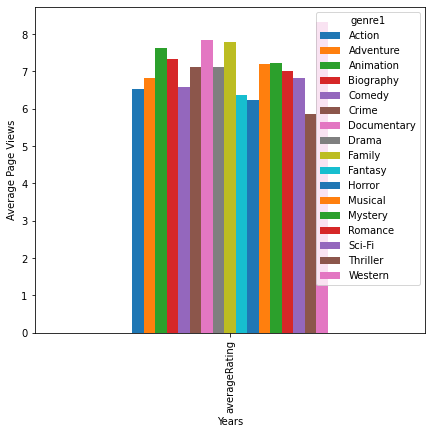

In [145]:
# Note moyenne par genre de films 

moyenne_genre = pd.pivot_table(
	frames6c,
	values="averageRating",
	columns="genre1",
	aggfunc=np.mean
)
 
# Plot a bar chart using the DF
ax = moyenne_genre.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")


plt.show()

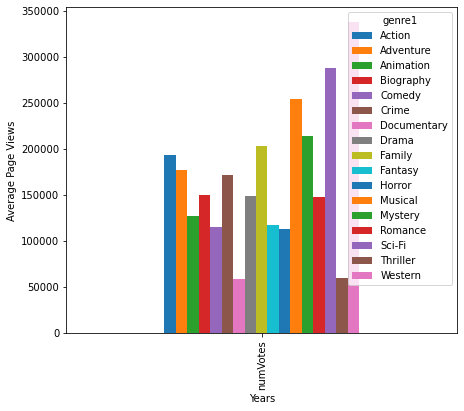

In [86]:
# Nombre moyen de votes par genre

nb_moyen_vote = pd.pivot_table(
	frames6,
	values="numVotes",
	columns="genre1",
	aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = nb_moyen_vote.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")


plt.show()